In [31]:
import pickle
import numpy as np
import pandas as pd 
from tabulate import tabulate
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

In [32]:
data_train = open('train.pkl','rb')
db_train = pickle.load(data_train)
data_test = open('test.pkl','rb')
db_test = pickle.load(data_test)

In [37]:
np.random.shuffle(db_train)
X = db_train[:,0]
Y = db_train[:,1]
X_test = db_test[:,0].reshape(-1,1)
Y_test = db_test[:,1].reshape(-1,1)
X_part = np.array_split(X,10)
Y_part = np.array_split(Y,10)
for i in range(10):
  X_part[i] = X_part[i].reshape(-1,1)
  Y_part[i] = Y_part[i].reshape(-1,1)

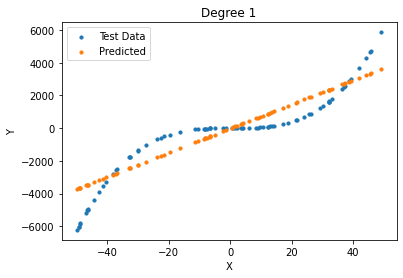

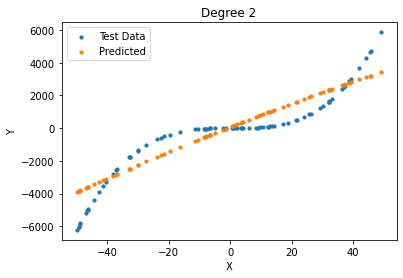

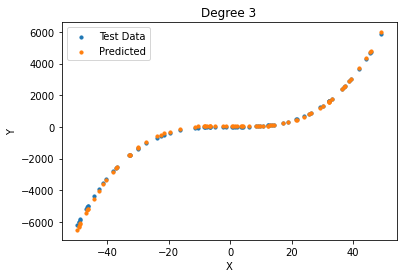

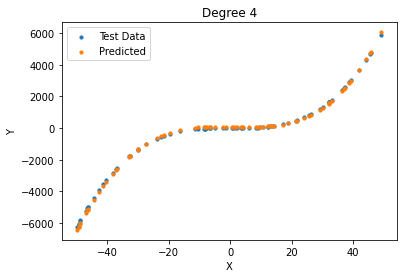

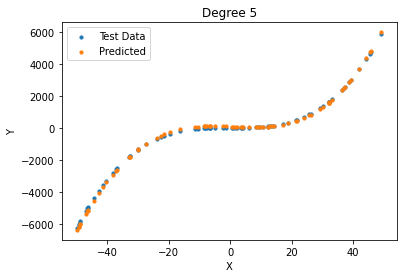

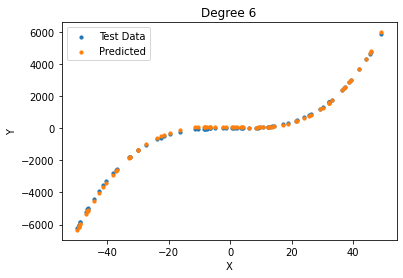

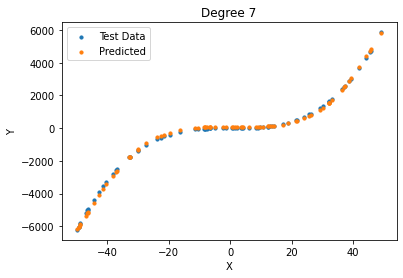

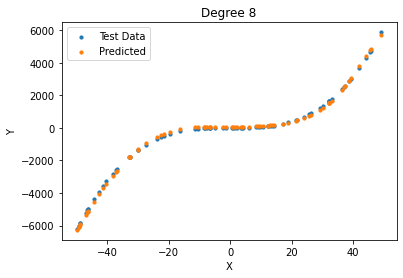

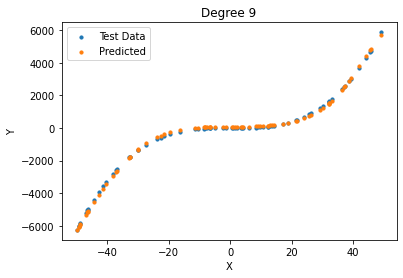

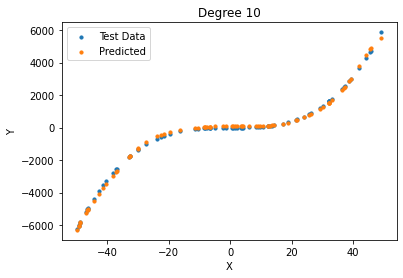

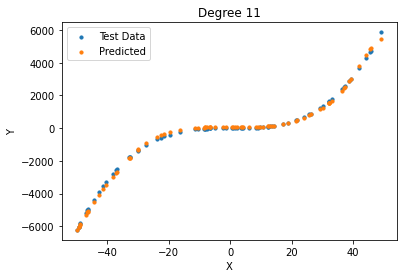

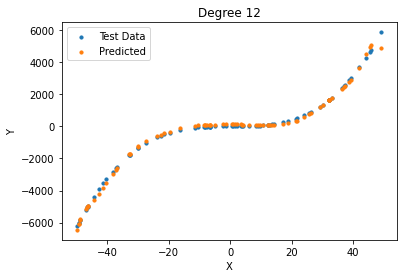

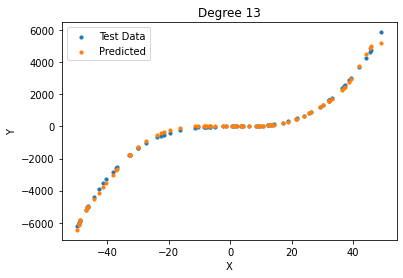

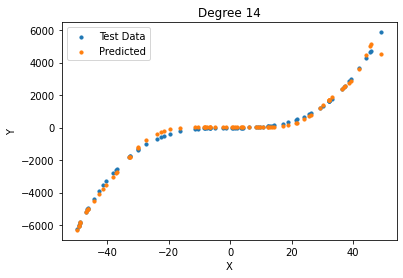

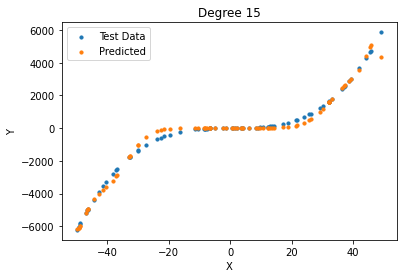

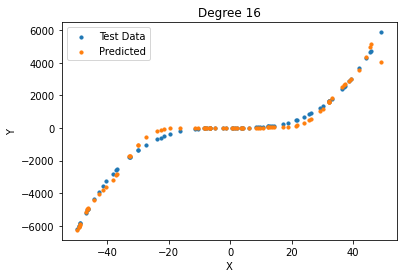

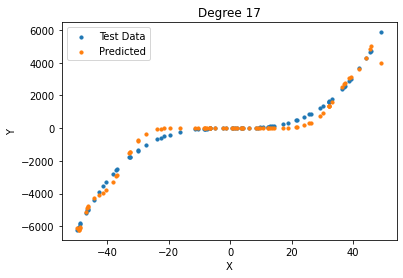

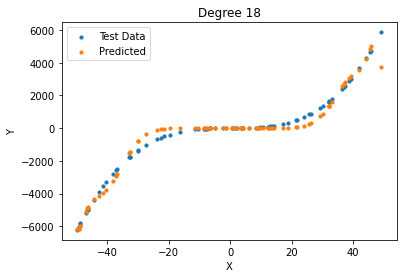

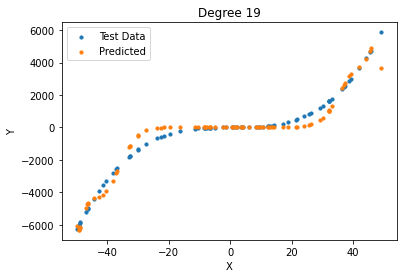

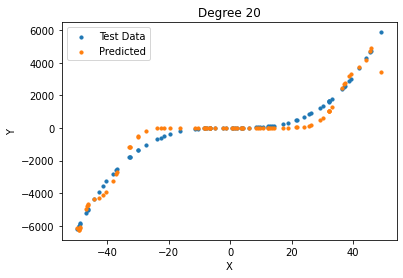

In [38]:
var =[]
bias = []
bias_sq = []
error = []
irr = []

for i in range(20):
  j=i+1
  var_per_model = []
  bias_per_model = []  
  bias2_per_model = []
  error_per_model = []
  y_pred_per_model = []
  irrerr_per_model = []
  for k in range(10):
    poly = PolynomialFeatures(degree = j)
    x_poly = poly.fit_transform(X_part[k])
    regr = LinearRegression()
    regr.fit(x_poly,Y_part[k])
    x_test_poly = poly.fit_transform(X_test)
    y_pred_per_model.append(regr.predict(x_test_poly))

  err_diff = (np.array(y_pred_per_model)-np.array(Y_test))**2
  error.append(np.mean(np.mean(err_diff,axis=0)))

  var_diff = (np.array(y_pred_per_model)-np.mean(y_pred_per_model,axis=0))**2
  var.append(np.mean(np.mean(var_diff,axis=0)))

  bias_sq_diff = (np.mean(y_pred_per_model,axis=0)-np.array(Y_test))**2
  bias_sq.append(np.mean(bias_sq_diff))

  bias_diff = abs(np.mean(y_pred_per_model,axis=0)-np.array(Y_test))
  bias.append(np.mean(bias_diff))

  irr.append(error[i]-bias_sq[i]-var[i])
  

  plt.scatter(X_test,Y_test,s=10)
  plt.scatter(X_test,np.mean(y_pred_per_model,axis=0),s=10)
  plt.legend(["Test Data","Predicted"])
  title = "Degree "
  title = title + str(j)
  plt.title(title)
  plt.xlabel("X")    
  plt.ylabel("Y")
  plt.show()

In [39]:
table_dict = {
    'Degree' : [i for i in range(1,21)],
    'Errors' : error,
    'Bias' : bias,
    'Bias^2' : bias_sq,
    'Variance' : var,
    'Irreducible error' : irr
}
print(tabulate(table_dict, headers='keys',tablefmt='psql',numalign='right',floatfmt=(".10f",".10f",".10f",".10f")))

+----------+--------------------+----------------+--------------------+------------+---------------------+
|   Degree |             Errors |           Bias |             Bias^2 |   Variance |   Irreducible error |
|----------+--------------------+----------------+--------------------+------------+---------------------|
|        1 | 1029327.8505180826 | 819.9123023490 | 1002531.2672992919 |    26796.6 |        -1.05501e-10 |
|        2 | 1005669.3415774340 | 811.5026681387 |  955594.9914227485 |    50074.4 |        -1.45519e-11 |
|        3 |   75868.5759312694 |  68.5213419149 |    9258.0533998231 |    66610.5 |         1.45519e-11 |
|        4 |   82918.3941685507 |  76.8255144057 |    8462.8465015851 |    74455.5 |                   0 |
|        5 |  117988.4509030274 |  75.2190784917 |    7959.0519227758 |     110029 |         1.45519e-11 |
|        6 |  123034.2656577772 |  71.3037855939 |    7105.9206202611 |     115928 |                   0 |
|        7 |  143610.1679922303 |  76

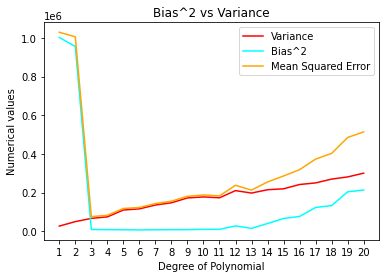

In [40]:
plt.plot(range(1,21),var,color="red")
plt.plot(range(1,21),bias_sq,color="cyan")
plt.plot(range(1,21),error,color="orange")
plt.legend(["Variance","Bias^2","Mean Squared Error"])
plt.xticks(range(1,21))
plt.xlabel("Degree of Polynomial")
plt.ylabel("Numerical values")
plt.title("Bias^2 vs Variance")
plt.show()